# Rocket Fun!

Congratulations! You have been hired by NASA! But they want you to get to work right away :( Today, they want you to analyze how a rocket should emit fuel over the distance it travels. Is it beneficial to emit a lot of fuel faster? or wait for a while after takeoff to emit the majority of the fuel? or is linear fuel emission the way to go? Which will get you the fastest velocity?

Man, working for NASA sure is hard... But you have to answer all these questions in order to complete the assignment. So let's start with this equation:

$\frac{dp}{dt}=\sum_{i}^{} F_i$ 

Here $p$ represents momentum and $F$ represents the force. In essence this is a version of Newton's 2nd Law for an object with varying velocity and mass. Why do we need it? Well the mass of the rocket is varying as the fuel is emitted and it is accelerating into space as well. You will need to keep several quantities in mind while you are doing your assignment: $v(t)$ as the velocity of the rocket, $m(t)$ as the mass of the rocket, $v_f$ as the speed at which the fuel is being emitted, and $\beta$ as the friction coefficient.

Let's start with the left hand side of our faveorite equation above. Use the definition of momentum and the chain rule to come with and equation relating $\frac{dp}{dt}$ with $\frac{dv}{dt}$ and $\frac{dm}{dt}$, in terms of the quantities given above.

Answer 1:
\\\\\\
$\frac{dp}{dt}=m\frac{dv}{dt} + v_f\frac{dm}{dt}$ 
\\\\\\\

Next, let's deal with the right hand side of the equation. You know Newton's second law so write down the law in terms of the varying mass, the acceleration due to gravity, the velocity of the rocket, and the friction coefficient. You only have to worry about the rocket while it is going upwards, so you can base your directionality off of that, but make sure to state any assumptions you make.

Answer 2:\\\ $\sum F=-m(t)g-v^2b$ \\\

Now set the two sides equal to eachother! However, this is going to be a pretty nasty equation so what will we do to solve it? You got it. Non-dimensionalize those variables. Find an expression for non dimensional variables $\frac{dV}{dT}$ using $v_f$, $g$, and $T_0$ as the characteristic speed, acceleration, and launch time, respectively. In order to dimensionalize $m(t)$, Let $M_0$ contain all the information about the rocket mass, the friction force, and the rate at which fuel is expelled, and $z(T)$ be the function that quantifies how fast the mass of the fuel is depleted, i.e. let $m(t)=m_0 z(T)$.

Answer 3:
\\ $\frac{dV}{dT}=\frac{-gT_0}{v_f}-\frac{V^2}{m_0z(T)}-\frac{1}{z(T)}\frac{dz(T)}{dT}$ \\

Now let's use some Python to figure out what this all looks like. You will need these imports:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
import sympy as smp


Below I define a the constants we will set for the remainder of the assignment. Use your math above to solve for nondimensional $m_0$ which you should have defined above.

In [9]:
T0 = 40 # 40 second launch
g = 9.81
vf = 500 # fuel emitted at 500m/s
M0 = 2e4 #20000kg rocket starting
b = 0.1 # coefficient of air friction


In [10]:
#Answer
m0 = M0/(b*vg*T0)

Now we will use a tool you may not have used before called sympy. Sympy is a Python tool which can perform symbolic integration and deifferention, which will be very useful for us in this assignment. First, we need to define $z(T)$. We left it earlier as just an arbotrary function, but in order to solve this problem we will need to let $z(T)=1-\frac{9}{10}T^n$ where $n$ is the fuel disposed at the given time. First we define $T$ and $n$ as symbols and our function $z(T)$. This has been done for you, but carefully examine the code.

In [33]:
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n

Next, we define $\frac{dz}{dT}$ by using sympy differentiation and a cool numerical tool called lambdify. In a tex cell below, write out how each of these works, what the built in functions take in and put out. Note, despite us using lowercase $t$ in Python we are still reffering to non-dimensional $T$.

In [34]:
dzdt = smp.diff(z, t).simplify()
z = smp.lambdify([t, n], z)
dzdt = smp.lambdify([t, n], dzdt)

Answer:::::

Now we must remember what we were assigned initially. We want to figure out different ways to expell fuel, To do this, we first need to figure out how the expulsion of fuel will look like versus time. You will plot 3 versions of fuel expulsion ($m(t)/m_0$) versus dimensionless time $t/T_0$. Create a linspace time array from around 0 to 1, with 100 points in between. Make sure you do not start from exactly 0, otherwise you will run into errors later on. Then pick three z values for the z function defined by lambdify above. Make sure one trajectory will provide a linear fit for fuel usage, one where the fuel usage will take place almost entirely at the start, and one where fuel usage will take place almost entirely at the end. Plot all three trajectories in the same plot, label them using a legend, and add a title for your plot as well as axis labels. Then in a markdown cell below, describe whaich trajectory is which and what you notice about them.

In [35]:
#Answer::::::::
t = np.linspace(1e-4, 1, 1000)
z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)

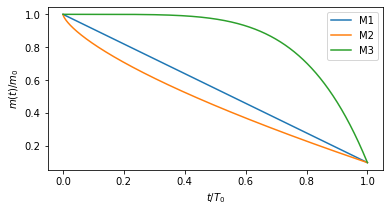

In [20]:
#Answer cotd.
plt.figure(figsize=(6,3))
plt.plot(t, z1, label='M1')
plt.plot(t, z2, label='M2')
plt.plot(t, z3, label='M3')
plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.legend()
plt.show()

Answer here:

Next, we want to solve the IVP for velocity and position of the rocket as a function of time, in order to find out which characteristics each fuel emission trajectory has. To do this we make a function which will give us our ODE and use scipy to get our solutions. The problem is that the equations will be different at different points. When you have different amounts of fuel left in your rocket, it will be travelling with different trajectories, so we must consider all scenarios in our function. We define our general solution as $\vec S=(\vec X, \vec V)$ and similarly, $\frac{d\vec S}{dt}=(\frac{d\vec X}{dT},\frac{d\vec V}{dT})$. Below I have started a function for you, with conditionals for when the rocket is full of fuel, when the rocket is out of fuel, and finally, when the rocket is travelling downwards with frefall acceleration. Fill in the differential equations needed for each case. Also, comment on what parameters the function is taking in and what it will return.

In [ ]:
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        
    # If out of fuel
    else:
        
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        
    return [dxdt,dvdt]

In [36]:
#Answer::::::
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]

Now, use the same three $z$ values from your fuel plot to create three different numerical solutions for velocity and position as a function of time. To integrate use scipy as solve_ivp which I have imported above. Look up syntax when needed. For your time array start very close to 0 once again and let it run upm to 3 characteristic times, once again with 1000 points throughout. Plot solutions for $V$ in one plot and solutions for $X$ in another. In put a vertical dotted line in each of the two plots, indicating when the trajectories change. Label your plots and provide a legend for each. 

In [46]:
#Answer:
n1, n2, n3 = 1, 0.7, 5
sol1 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n3, T0))

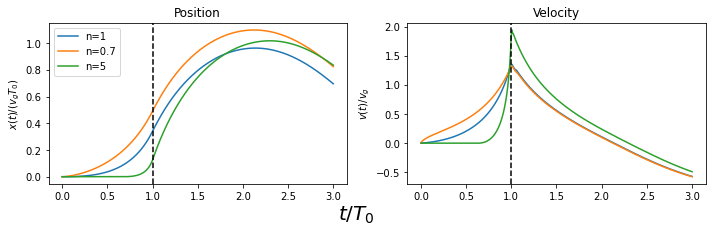

In [47]:
#Answer cotd.
fig, axes = plt.subplots(1, 2, figsize=(10,3))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=1.3')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()

You have completed your first NASA assignment! Great job! Now play around a bit with the values which you used. Write a brief paragraph about which type of fuel emission you consider most useful and in which cases we will want to use each one. When does each trajectory stop making sense?

Answer here: